<a href="https://colab.research.google.com/github/ncsu-landscape-dynamics/LAMP_assay_automation/blob/main/pytorch_finetuningimseg-test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
#https://pytorch.org/tutorials/intermediate/torchvision_tutorial.html

import os
import numpy as np
import torch
import torch.utils.data
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

class four_chs(torch.utils.data.Dataset):
    def __init__(self, root, transforms=None, target_transform=None):
        self.root = root
        self.transforms = transforms
        self.target_transform = target_transform
        # load all image files, sorting them to
        # ensure that they are aligned
        self.imgs = list(sorted(os.listdir(os.path.join(root, "imgs"))))
        self.masks = list(sorted(os.listdir(os.path.join(root, "masks"))))

    def __getitem__(self, idx):
        # load images ad masks
        img_path = os.path.join(self.root, "imgs", self.imgs[idx])
        mask_path = os.path.join(self.root, "masks", self.masks[idx])
        img = Image.open(img_path).convert("RGB")
        # note that we haven't converted the mask to RGB,
        # because each color corresponds to a different instance
        # with 0 being background
        mask = Image.open(mask_path)

        mask = np.array(mask)
        # instances are encoded as different colors
        obj_ids = np.unique(mask)
        # first id is the background, so remove it
        obj_ids = obj_ids[1:]

        # split the color-encoded mask into a set
        # of binary masks
        masks = (mask == obj_ids[:, None, None]).astype(int)

        # get bounding box coordinates for each mask
        num_objs = len(obj_ids)
        boxes = []
        for i in range(num_objs):
            pos = np.where(masks[i])
            xmin = np.min(pos[1])
            xmax = np.max(pos[1])
            ymin = np.min(pos[0])
            ymax = np.max(pos[0])
            boxes.append([xmin, ymin, xmax, ymax])

        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        # there is only one class
        labels = torch.ones((num_objs,), dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)

        image_id = torch.tensor([idx])
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        # suppose all instances are not crowd
        iscrowd = torch.zeros((num_objs,), dtype=torch.int64)

        target = {}
        target["boxes"] = boxes
        target["labels"] = labels
        target["masks"] = masks
        target["image_id"] = image_id
        target["area"] = area
        target["iscrowd"] = iscrowd

        if self.transforms is not None:
            img, target = self.transforms(img, target)

        return img, target

    def __len__(self):
        return len(self.imgs)

Mounted at /content/drive


In [20]:
import transforms as T

def get_transform(train):
    transforms = []
    transforms.append(T.ToTensor())
    if train:
        transforms.append(T.RandomHorizontalFlip(0.5))
    return T.Compose(transforms)

ModuleNotFoundError: ignored

In [2]:
dataset = four_chs(root="/content/drive/MyDrive/APHIS Farm Bill (2020Milestones)/Protocols/For John/images/New set for John/collection/four_chambers")

In [ ]:
mask = image.getchannel('A') # getting the mask from the alpha channel (png image), 255 for foreground, 0 otherwise
mask = numpy.asarray(mask) 
mask = np.asarray(mask, dtype= 'int') # or uint8 
mask=mask/255 # 0 to 1 scale

In [23]:

data_loader = torch.utils.data.DataLoader(
 dataset, batch_size=2, shuffle=True, num_workers=4)
# For Training
images,targets = next(iter(data_loader))
images = list(image for image in images)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


AttributeError: ignored

In [ ]:
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# load a model pre-trained pre-trained on COCO
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

# replace the classifier with a new one, that has
# num_classes which is user-defined
num_classes = 6  # 1 class (person) + background
# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features
# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

In [94]:
#this is for testing. 
mask = Image.open("/content/drive/MyDrive/APHIS Farm Bill (2020Milestones)/Protocols/For John/images/New set for John/collection/four_chambers/mask_1_61_gy.png") #masks/mask_1_61_rev_color.png")

#mask = mask.getchannel('A') # getting the mask from the alpha channel (png image), 255 for foreground, 0 otherwise
#mask=mask/255 # 0 to 1 scale
#
mask = np.array(mask)

# instances are encoded as different colors
obj_ids = np.arange(5,30, 5, dtype='uint8')
obj_ids = np.delete(obj_ids, 2)

# split the color-encoded mask into a set
# of binary masks
masks = mask == obj_ids[:, None, None]

# get bounding box coordinates for each mask
num_objs = len(obj_ids)
boxes = []
for i in range(num_objs):
    pos = np.where(masks[i])
    xmin = np.min(pos[1])
    xmax = np.max(pos[1])
    ymin = np.min(pos[0])
    ymax = np.max(pos[0])
    boxes.append([xmin, ymin, xmax, ymax])


In [63]:
obj_ids = np.unique(mask)
obj_ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
valus,numes = np.unique(mask, return_counts=True)
for vals,nums in zip(valus,numes):
    print(f"value {vals} {nums} times")

In [96]:
obj_ids = np.arange(5,30, 5, dtype='uint8')
obj_ids = np.delete(obj_ids, 2)

In [135]:
mask = Image.open("/content/drive/MyDrive/APHIS Farm Bill (2020Milestones)/Protocols/For John/images/New set for John/collection/four_chambers/mask_1_61_gy.png") #masks/mask_1_61_rev_color.png")
mask = remove_transparency(mask).convert("L")
#mask = mask.getchannel('A') # getting the mask from the alpha channel (png image), 255 for foreground, 0 otherwise
#mask=mask/255 # 0 to 1 scale
#
mask = np.array(mask)

massk = mask == obj_ids[:,None,None]

NameError: ignored

In [ ]:
massk

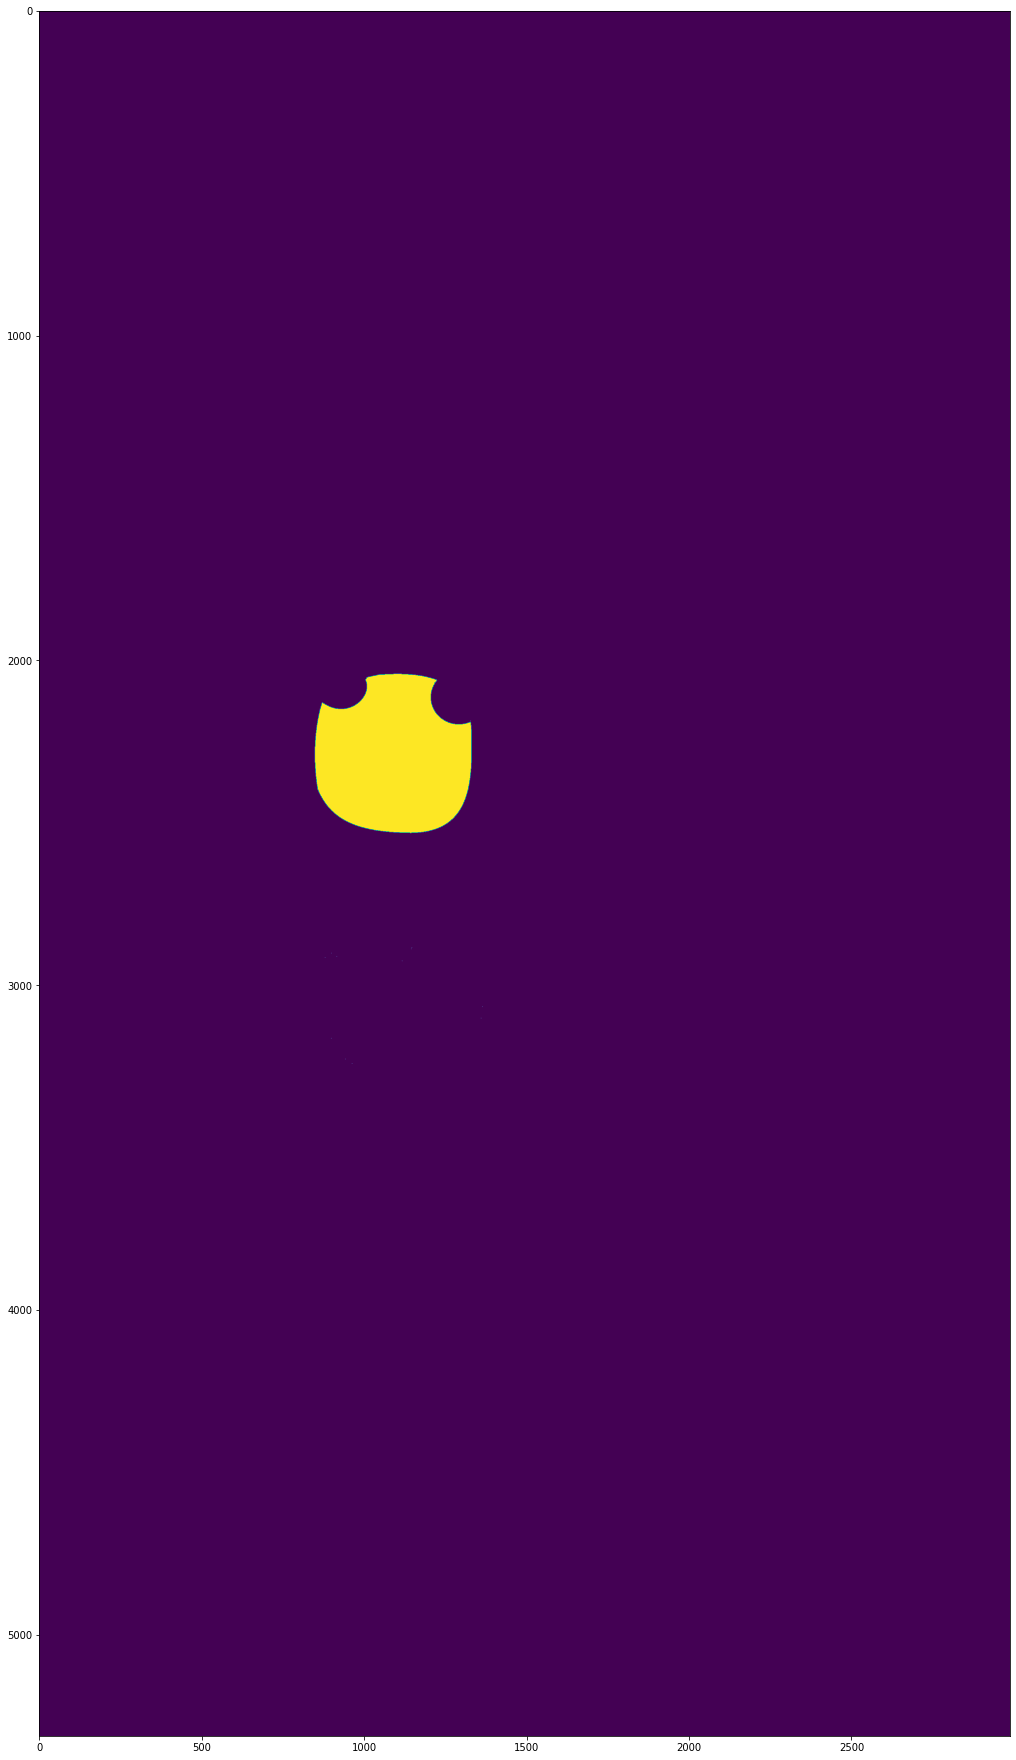

In [115]:
plt.figure(figsize=(80,40))
plt.subplot(1,4,1)
plt.imshow(massk[0])
#plt.subplot(1,4,2)
#plt.imshow(massk[1])
#plt.subplot(1,4,3)
#plt.imshow(massk[2])
#plt.subplot(1,4,4)
#plt.imshow(massk[3])

In [137]:
pos = np.where(massk)
valus,numes = np.unique(mask, return_counts=True)
for vals,nums in zip(valus,numes):
    print(f"{vals} {nums}")

0 15090865
1 65
2 93
3 33
4 62
5 184400
6 58
7 23
8 54
9 19
10 202969
11 24
12 35
13 18
14 42
15 17
16 35
17 27
18 29
19 12
20 215326
21 16
22 42
23 30
24 12
25 173106
26 19
27 37
28 13
29 26
30 12
31 33
32 10
33 42
34 24
35 29
36 10
37 26
38 20
39 6
40 32
41 12
42 19
43 11
44 26
45 13
46 23
47 4
48 32
49 23
50 15
51 32
52 8
53 20
54 14
55 30
56 26
57 13
58 32
59 12
60 26
61 5
62 42
63 43
64 7
65 26
66 25
67 23
68 22
69 27
70 21
71 14
72 32
73 6
74 32
75 18
76 8
77 32
78 8
79 31
80 34
81 14
82 25
83 11
84 29
85 38
86 14
87 30
88 10
89 21
90 24
91 11
92 44
93 22
94 18
95 23
96 8
97 30
98 21
99 15
100 16
101 20
102 27
103 20
104 28
105 10
106 27
107 28
108 13
109 21
110 20
111 16
112 40
113 12
114 12
115 32
116 22
117 15
118 40
119 42
120 22
121 23
122 27
123 29
124 13
125 23
126 6
127 27
128 24
129 22
130 7
131 22
132 17
133 9
134 21
135 25
136 39
137 8
138 15
139 20
140 17
141 13
142 30
143 22
144 26
145 15
146 21
147 23
148 23
149 11
150 24
151 26
152 28
153 50
154 7
155 25
156 22
157

In [ ]:
pos = np.where(massk[1])
valus,numes = np.unique(pos, return_counts=True)
for vals,nums in zip(valus,numes):
    print(f"{vals} {nums}")

In [107]:
xmin = np.min(pos[1])
xmax = np.max(pos[1])
ymin = np.min(pos[0])
ymax = np.max(pos[0])
print(xmin, xmax, ymin, ymax)

849 1364 2043 3242


In [106]:
pos1 = np.where(massk[1])
pos1

(array([2000, 2000, 2000, ..., 3271, 3271, 3313]),
 array([1903, 1913, 1914, ..., 1064, 2073, 1982]))

In [108]:
xmin = np.min(pos1[1])
xmax = np.max(pos1[1])
ymin = np.min(pos1[0])
ymax = np.max(pos1[0])
print(xmin, xmax, ymin, ymax)

849 2146 2000 3313


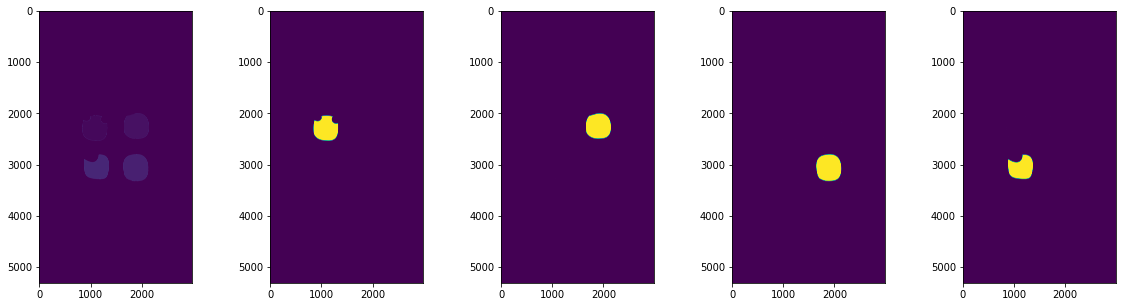

In [56]:
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
plt.imshow(mask3)
plt.subplot(1,5,2)
plt.imshow(mask3 == 5)
plt.subplot(1,5,3)
plt.imshow(mask3 == 10)
plt.subplot(1,5,4)
plt.imshow(mask3 == 20)
plt.subplot(1,5,5)
plt.imshow(mask3 == 25)

In [129]:
pos2 = np.where(mask == 5)
pos2

(array([2043, 2043, 2043, ..., 3164, 3228, 3242]),
 array([1091, 1092, 1093, ...,  899,  942,  963]))

In [95]:
boxes

[[849, 2043, 1364, 3242],
 [849, 2000, 2146, 3313],
 [856, 2012, 2140, 3319],
 [848, 2048, 2141, 3279]]